**Regression** is one of the supervised learning methods in machine learning. Given a training set of data containing observations and their associated continuous outputs, the goal of regression is to explore the relationships between the observations (also called features) and the targets, and to output a continuous value based on the input features of an unknown
sample [1].


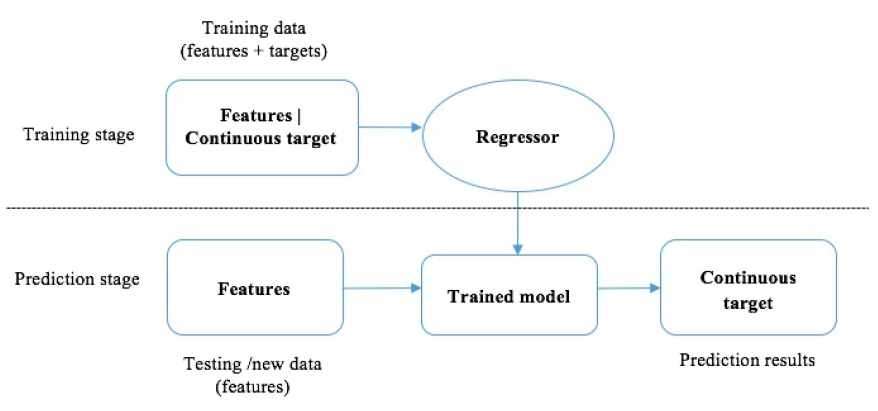

**Linear regression** explores the linear relationship between observations and targets and the relationship is represented in a linear equation or weighted sum function. Given a data sample
    *x* with *n* features $x_{1}$, $x_{2}$, ..., $x_{n}$(*x* represents a feature vector and *x = ($x_{1}$, $x_{1}$, ...,$x_{1}$)*), and **weights** (also called **coefficients**) of the linear regression model *w* (*w* represents a vector ($w_{1}$, $w_{2}$, ..., $w_{n}$)), the target *y* is expressed as follows: 
    
   *y = $w_{1}$ $x_{1}$ + $w_{2}$ $x_{2}$ + ... + $w_{n}$ $x_{n}$ =  $w^{T}x$*
   
Or sometimes, the linear regression model comes with an **intercept** (also called **bias**) $w_{0}$, the preceding linear relationship becomes as follows:

   *y = $w_{0}$ + $w_{1}$ $x_{1}$ + $w_{2}$ $x_{2}$ + ... + $w_{n}$ $x_{n}$ =  $w^{T}x$*


A linear regression model, or specifically, its weight vector *w* is learned from the training data, with the goal of minimizing the estimation error defined as **mean squared error (MSE)**, which measures the average of squares of difference between the truth and prediction. Give *m* training
samples,

($x^{1}$,$y^{1}$), ($x^{2}$,$y^{2}$),.., ($x^{i}$,$y^{i}$),..., ($x^{m}$,$y^{m}$)

the cost function *J(w)* regarding the weights to be optimized is expressed as follows:

$$J(w) = \frac{1}{m}\sum \limits _{i=1} ^ {m} \frac{1}{2}(\hat{y}(x^{i})-y^{i})^{2}$$
where

$\hat{y}(x^{(i)})= w^{T}x^{(i)}$


In this assignment, you are supposed to create a linear regression model from scratch **without using the scikit learn library for modeling**.  You are given a dataset consisting of actual car advertisements belonging to 2020. You will use the model to predict the values of "**Fiyat**". Since this is raw data, you need to prepare your data using preprocessing methods such as encoding the categorical data, feature scaling (standardization/normalization) etc. before creating linear regression modeling. 

You are given train data ( observations with labels) and test data (observations without labels). You will perform a regression task by using training data. Before your modeling, you can apply the feature selection method. Thus you do not have to use all features. Split the given train data into your own training and testing set, with a 0.8-0.2 ratio (training set will be %80, and the test set will be %20 of the dataset). Evaluate your **training MSEs** by **plotting** and create a table for your **test MSEs**. Implementation of your model will consist of multiple different parts that influence the total performance. Therefore, it is very important to provide ways to measure the contribution of these parts to the overall model. In the table, you will present the results of the ablation study in your learning model. Your ablation study should include the following steps:

 - Linear regression
 - Feature space extension (using Polynomial or other kernels)
 - Regularization ( Put the results with different regularization weights in your table, as well.)
 
Finally use the given original test data for your best prediction result (predicted 'Fiyat' values), save it as csv file, and upload it to the Kaggle competition. Furthermore, you are supposed to upload your coding in Jupyter notebook to the department's submission system.

Kaggle competition: https://www.kaggle.com/t/acbad5aee9684d45b1a5a564c6bdfb24

[1]: Yuxi (Hayde) Lui, Python Machine Learning by Example, 2020

In [7]:
#import necessary libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np


In [8]:
# Load train and test data
data = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [9]:
# Code here for data preprocessing (You can enlarge the cell as much as you want.)
# You can apply feature selection to reduce the input variable to your model
# by using only relevant data and getting rid of noise in data. 
# You can consider coefficients to have an idea about feature importance.

# Create a DataFrame with the necessary columns from the original data
gerekliData = pd.DataFrame(data=data, columns=["Yil", "KM", "Seri", "Model"]) 

# Use one-hot encoding to convert categorical variables into binary variables
data_encoded = pd.get_dummies(gerekliData, columns=["Seri", "Model"])

# Create a DataFrame with the necessary columns from the test data
gerekliTestData = pd.DataFrame(data=data_test, columns=["Yil", "KM", "Seri", "Model"])

# Use one-hot encoding to convert categorical variables into binary variables for the test data
data_encoded_test = pd.get_dummies(gerekliTestData, columns=["Seri", "Model"])

# Make sure the test data has the same columns as the training data
data_encoded_test = data_encoded_test.reindex(columns=data_encoded.columns, fill_value=0)

# Create a DataFrame with only the 'Fiyat' column from the original data
fiyat = pd.DataFrame(data=data, columns=["Fiyat"]) 

# Convert 'Fiyat' column to float and remove unnecessary characters
# Convert corrupted values to meaningful values
newfiyat = []
for f in fiyat["Fiyat"].values:
    f = f.replace(' TL', '').replace('.', '').replace(',', '')
    if float(f) < 10000:
        f = 10000
    newfiyat.append(float(f))

# Convert the new 'Fiyat' values back into a DataFrame
newfiyatdf = pd.DataFrame(newfiyat)

# Split the encoded data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data_encoded, newfiyatdf, test_size=0.2, random_state=0)

# Scale the training and test data using the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Warning: Do not use scikit learn library for regression implementation 

In [10]:
# Code here for Regression implementation (You can enlarge the cell as much as you want.)
# Do not use scikit learn library for implementation 


class LinearRegression:
    def __init__(self, alpha=0, regularization=None):
        """
        Initialize LinearRegression object.
        
        Parameters:
        alpha (float): regularization strength. Default is 0 (no regularization).
        regularization (str): regularization method. Options are 'l1' (Lasso) and 'l2' (Ridge).
        """
        self.alpha = alpha
        self.regularization = regularization
        self.coefficients = None
        
    def fit(self, X, y):
        """
        Fit Linear Regression model to training data.
        
        Parameters:
        X (numpy array): training input data.
        y (numpy array): training output data.
        """
        n_samples, n_features = X.shape
        X = np.insert(X, 0, 1, axis=1) # Add a column of 1s for the intercept term
        if self.regularization == 'l1':
            identity = np.eye(n_features+1) # Create identity matrix
            identity[0, 0] = 0 # Don't penalize the intercept term
            self.coefficients = np.linalg.inv(X.T @ X + self.alpha * identity) @ X.T @ y
        elif self.regularization == 'l2':
            self.coefficients = np.linalg.inv(X.T @ X + self.alpha * np.eye(n_features+1)) @ X.T @ y
        
    def predict(self, X):
        """
        Make predictions using Linear Regression model.
        
        Parameters:
        X (numpy array): input data.
        
        Returns:
        y_pred (numpy array): predicted output data.
        """
        X = np.insert(X, 0, 1, axis=1) # Add a column of 1s for the intercept term
        y_pred = X @ self.coefficients
        return y_pred

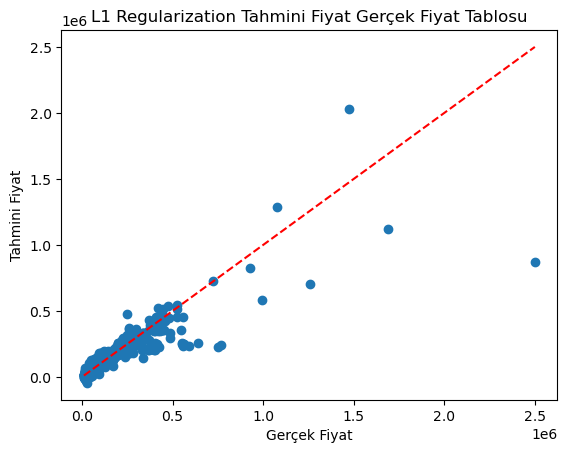

Test MSE: 3358350244.4822845


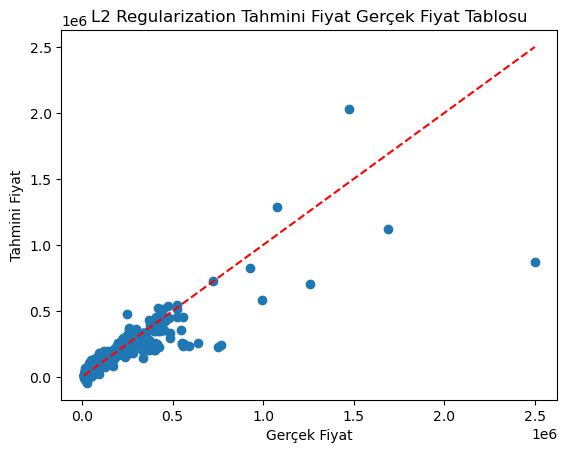

Test MSE: 3358360535.6125603


In [11]:
# l1 regularization part

# Fit the linear regression model to the training data
model = LinearRegression(alpha=0.1, regularization='l1')

# Fit the model to the data
model.fit(X_train_scaled, y_train)

# Make predictions for new data
y_pred = model.predict(X_test_scaled)

plt.scatter(y_test, y_pred)

# Add a diagonal line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')

# Add labels and title
plt.xlabel('Gerçek Fiyat')
plt.ylabel('Tahmini Fiyat')
plt.title('L1 Regularization Tahmini Fiyat Gerçek Fiyat Tablosu')

# Show the plot
plt.show()


# l2 regularization part
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)

model = LinearRegression(alpha=0.1, regularization='l2')

# Fit the model to the data
model.fit(X_train_scaled, y_train)

# Make predictions for new data
y_pred = model.predict(X_test_scaled)

plt.scatter(y_test, y_pred)

# Add a diagonal line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')

# Add labels and title
plt.xlabel('Gerçek Fiyat')
plt.ylabel('Tahmini Fiyat')
plt.title('L2 Regularization Tahmini Fiyat Gerçek Fiyat Tablosu')


# Show the plot
plt.show()

test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)

# Make predictions for test data
#X_test_scaled = scaler.transform(data_encoded_test)
#test_pred = model.predict(X_test_scaled)

# Convert prediction to DataFrame
#test_pred = pd.DataFrame(test_pred)

# Add index and Change Name of Columns
#test_pred = test_pred.reset_index().rename(columns={'index': 'Id'})
#test_pred = test_pred.rename(columns={test_pred.columns[1]:"Fiyat"})

# Make indexes start from 1
#test_pred["Id"] = test_pred["Id"]+1

# Create output file
#test_pred.to_csv("output.csv", index = False)
